<a href="https://colab.research.google.com/github/tntly/ml-projects/blob/main/CS_123_Final_Project_SVM_Model_BRAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) Prediction of BRAF V600E Inhibitors

> Author: Tien Ly  
> CS/BIOL 123A: Bioinformatics I - Fall 2023 at San Jose State University

This project uses Support Vector Machines (SVM) to predict small molecules that may inhibit the BRAF-V600E mutation, a key target in cancer therapy. The model is trained on a dataset of 243 compounds from the PubChem Compound database and evaluated using accuracy, precision, recall, and ROC curve analysis to assess predictive performance. The goal is to contribute to drug discovery by improving the identification of potential inhibitors with greater efficiency and precision.

## Data Exploration

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data from Google Sheets
starting_url = 'https://docs.google.com/spreadsheets/d/1pOjJyjIr-bJt29cNMPZahalHbCyU7L_bZ64EZdTBNb4/edit?usp=sharing'
new_url = starting_url.replace('edit?usp=sharing', 'export?format=csv')
compounds = pd.read_csv(new_url)
compounds

,CID,Class,PUBCHEM_XLOGP3_AA,PUBCHEM_EXACT_MASS,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_CACTVS_TPSA,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_TOTAL_CHARGE,PUBCHEM_HEAVY_ATOM_COUNT,PUBCHEM_ATOM_DEF_STEREO_COUNT,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,11574718,0,3.1,393.16885,393.43573,81.699997,393.16885,0,29,0,...,113.500,23.875,7.375,0.250,0.0,0.0,393.44299,2450,45,146
1,11588394,0,2.0,353.13754,353.37186,81.199997,353.13754,0,26,0,...,112.250,27.250,8.750,1.625,0.0,0.0,353.37799,1786,41,132
2,11595532,0,2.9,353.13754,353.37186,85.699997,353.13754,0,26,0,...,101.500,22.125,6.500,0.375,0.0,0.0,353.37799,1767,41,132
3,11603925,0,3.5,409.16376,409.43512,91.800003,409.16376,0,30,0,...,94.750,15.375,5.000,0.375,0.0,0.0,409.44199,2694,48,150
4,11624721,0,3.0,362.13788,362.38193,89.300003,362.13788,0,27,0,...,98.750,15.750,5.000,0.375,0.0,0.0,362.38898,1976,43,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,86766662,1,4.0,453.11584,453.48599,109.000000,453.11584,0,32,0,...,138.125,25.375,7.375,0.875,0.0,0.0,453.49399,3065,52,172
239,86766668,1,4.9,379.11322,379.35950,67.300003,379.11322,0,28,0,...,98.125,17.250,4.875,0.375,0.0,0.0,379.36600,2055,48,150
240,86766679,1,4.6,367.14331,367.40329,75.699997,367.14331,0,28,0,...,117.375,22.250,5.750,0.375,0.0,0.0,367.41199,2096,46,154
241,86766683,1,4.6,344.11609,344.36334,64.500000,344.11609,0,26,0,...,71.750,5.125,1.125,0.000,0.0,0.0,344.37000,1748,41,138


In [ ]:
# Display class distribution
compounds.Class.value_counts() / len(compounds)

1    0.703704
0    0.296296
Name: Class, dtype: float64

In [ ]:
compounds.Class.value_counts()

1    171
0     72
Name: Class, dtype: int64

In [ ]:
# Display information about the dataset
compounds.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 357 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    CID                             243 non-null    int64  
 1    Class                           243 non-null    int64  
 2    PUBCHEM_XLOGP3_AA               243 non-null    float64
 3    PUBCHEM_EXACT_MASS              243 non-null    float64
 4    PUBCHEM_MOLECULAR_WEIGHT        243 non-null    float64
 5    PUBCHEM_CACTVS_TPSA             243 non-null    float64
 6    PUBCHEM_MONOISOTOPIC_WEIGHT     243 non-null    float64
 7    PUBCHEM_TOTAL_CHARGE            243 non-null    int64  
 8    PUBCHEM_HEAVY_ATOM_COUNT        243 non-null    int64  
 9    PUBCHEM_ATOM_DEF_STEREO_COUNT   243 non-null    int64  
 10   PUBCHEM_ATOM_UDEF_STEREO_COUNT  243 non-null    int64  
 11   PUBCHEM_BOND_DEF_STEREO_COUNT   243 non-null    int64  
 12   PUBCHEM_BOND_UDEF_ST

In [ ]:
# Remove columns with a single unique value
for col in compounds.columns:
  if compounds[col].nunique() == 1:
    compounds = compounds.drop(col, axis=1)

In [ ]:
# Display information after removing constant columns
compounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 313 entries, CID to zagreb
dtypes: float64(254), int64(59)
memory usage: 594.3 KB


In [ ]:
# Display columns with missing values
compounds.columns[compounds.isna().any()]

Index(['MNDO_E', 'MNDO_Eele', 'MNDO_HF', 'MNDO_HOMO', 'MNDO_IP', 'MNDO_LUMO'], dtype='object')

## Splitting Data into Training and Test Sets

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = compounds.drop(['CID', 'Class'], axis=1)
y = compounds['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(194, 311)
(49, 311)


In [ ]:
y_train.value_counts()

1    137
0     57
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

1    34
0    15
Name: Class, dtype: int64

## Pre-Processing

In [ ]:
# Preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Create a pipeline with imputation, scaling, and feature selection
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # replace missing values
    ('scaler', StandardScaler()), # scaling step
    ('kbest', SelectKBest(f_classif, k=20)) # select top 20 features
])

# Transform the training and test data
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_test_transformed = pipe.transform(X_test)

In [ ]:
# Get the names of the selected columns
selected_columns_mask = pipe.named_steps['kbest'].get_support()
selected_column_names = X_train.columns[selected_columns_mask]

selected_column_names

Index(['a_nO', 'BCUT_PEOE_3', 'BCUT_SMR_3', 'b_max1len', 'GCUT_PEOE_0',
       'GCUT_PEOE_1', 'GCUT_PEOE_3', 'GCUT_SMR_3', 'lip_don', 'logS',
       'MNDO_HF', 'MNDO_LUMO', 'PEOE_VSA-4', 'PEOE_VSA_NEG', 'PEOE_VSA_POL',
       'SlogP_VSA0', 'SlogP_VSA5', 'SMR_VSA3', 'vsa_other', 'vsa_pol'],
      dtype='object')

## Run SVM and Model Evaluation

In [ ]:
# Model training and evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [ ]:
# Function to display cross-validation scores
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [ ]:
# Cross-validation scores
scores_svc = cross_val_score(svc, X_train_transformed, y_train, scoring='accuracy', cv=10)
display_scores(scores_svc)

Scores: [0.9        1.         0.95       0.9        0.94736842 1.
 0.94736842 0.78947368 1.         1.        ]
Mean: 0.9434210526315789
Standard deviation: 0.06352143180981498


In [ ]:
# Fit the model on the training data
svc.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test_transformed)

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

print('\nTrue Positives (TP) = ', cm[1 ,1])

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

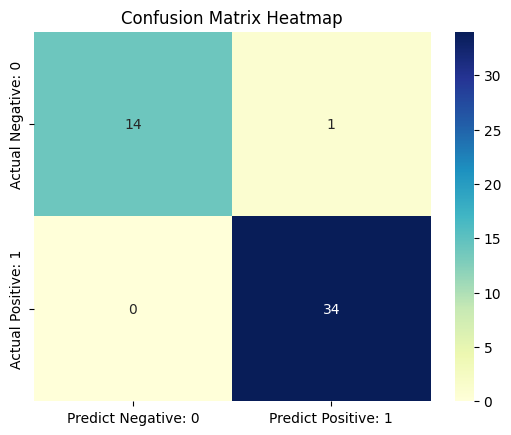

In [ ]:
# Display the heapmap
cm_matrix = pd.DataFrame(data=cm,
                         columns=['Predict Negative: 0', 'Predict Positive: 1'],
                         index=['Actual Negative: 0', 'Actual Positive: 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix Heatmap')

from google.colab import files
plt.savefig('heatmap.png')

In [ ]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.99        34

    accuracy                           0.98        49
   macro avg       0.99      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



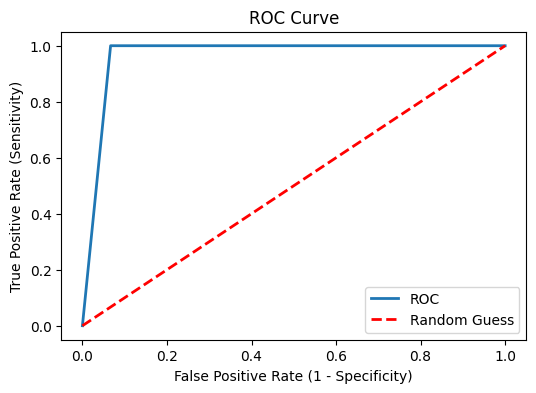

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, label='ROC')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve');

In [ ]:
# Compute the ROC AUC
# Receiver Operating Characteristic - Area Under Curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.9667
